In [99]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from scipy import stats
from matplotlib import pyplot
import matplotlib as plt
from matplotlib import *
from scipy.stats.mstats import winsorize

In [100]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# data modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
# evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [101]:
df = pd.read_csv('/content/Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [103]:
df.index

RangeIndex(start=0, stop=2938, step=1)

In [104]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

As we can see, there are many NA values . We will replace these values with the mean value of the variable

In [105]:
df = df.groupby(['Status']).apply(lambda x: x.fillna(x.mean()))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [106]:
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [107]:
df.duplicated().sum()

0

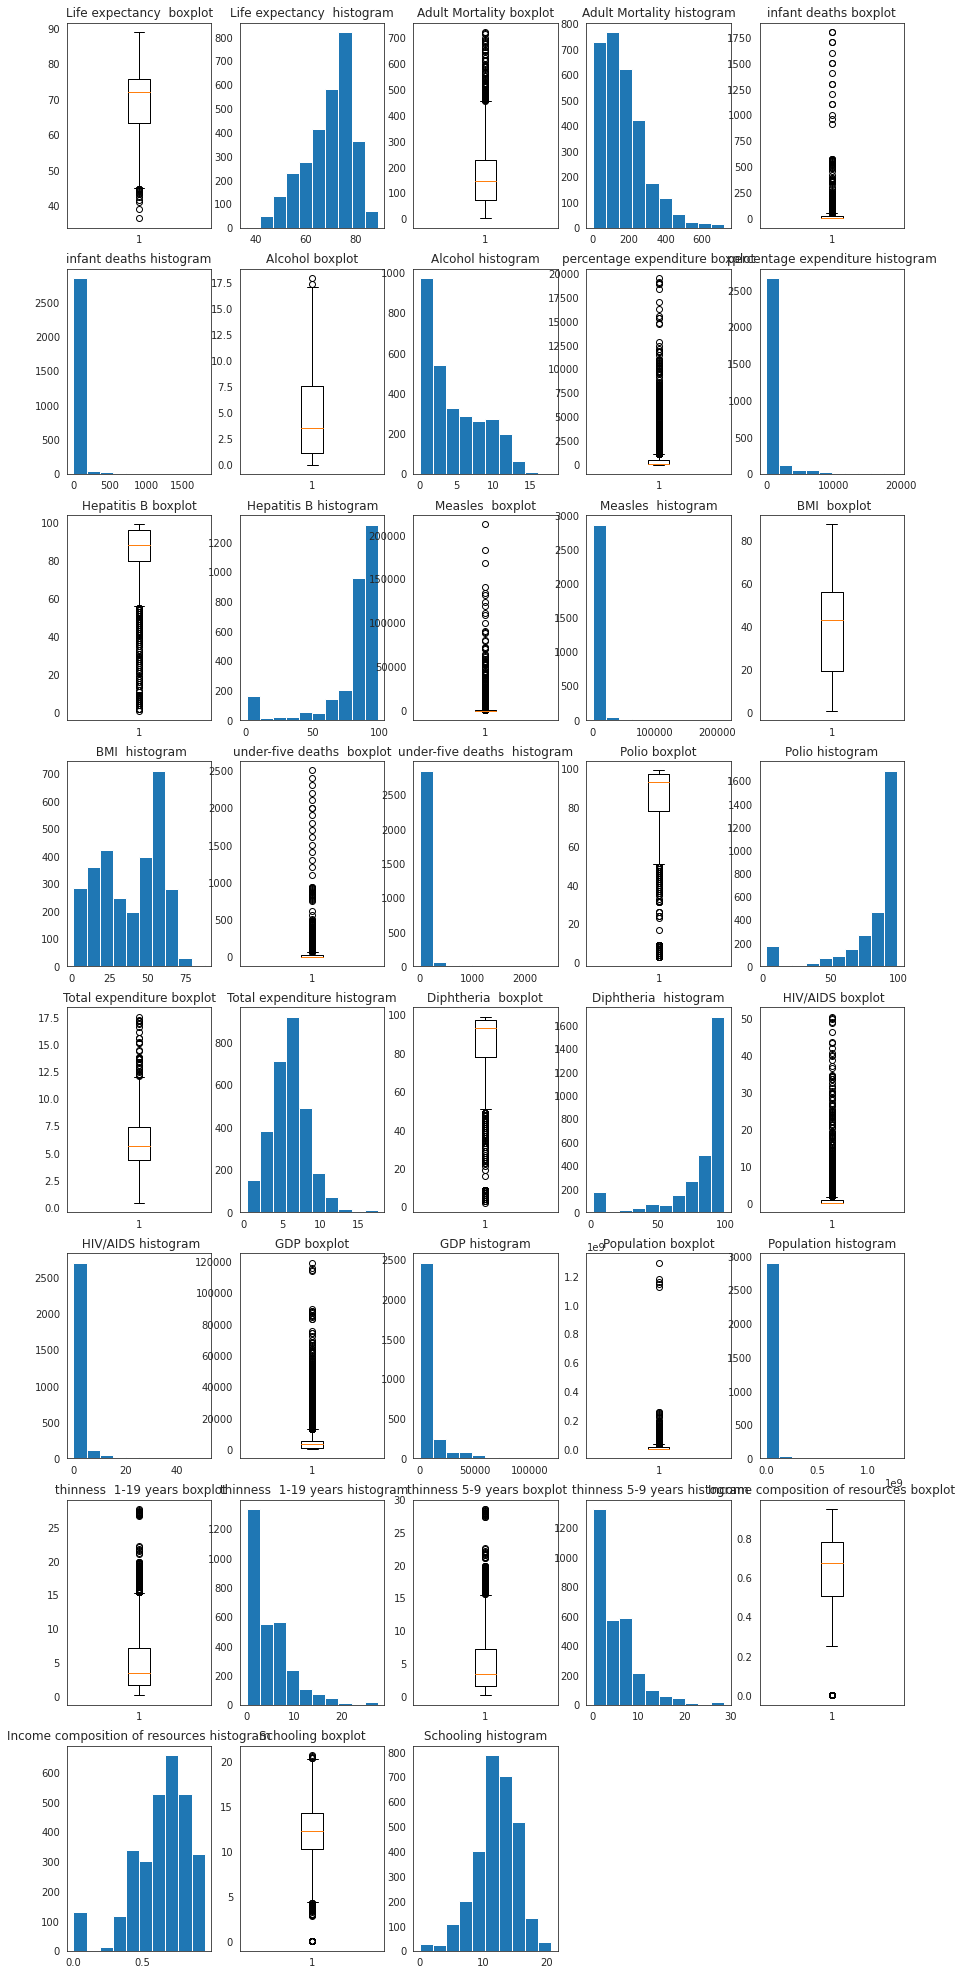

In [108]:
cont_vars = list(df.columns)[3:]
def outliers_visual(data):
    pyplot.figure(figsize=(15, 40))
    i = 0
    for col in cont_vars:
        i += 1
        pyplot.subplot(9, 5, i)
        pyplot.boxplot(data[col])
        pyplot.title('{} boxplot'.format(col))
        i += 1
        pyplot.subplot(9, 5, i)
        pyplot.hist(data[col])
        pyplot.title('{} histogram'.format(col))
    pyplot.show()
outliers_visual(df)

In [109]:
def outlier_count(col, data=df):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [110]:
for col in cont_vars:
    outlier_count(col)

---------------Life expectancy ---------------
Number of outliers: 17
Percent of data that is outlier: 0.58%
---------------Adult Mortality---------------
Number of outliers: 86
Percent of data that is outlier: 2.93%
---------------infant deaths---------------
Number of outliers: 315
Percent of data that is outlier: 10.72%
---------------Alcohol---------------
Number of outliers: 2
Percent of data that is outlier: 0.07%
---------------percentage expenditure---------------
Number of outliers: 389
Percent of data that is outlier: 13.24%
---------------Hepatitis B---------------
Number of outliers: 298
Percent of data that is outlier: 10.14%
---------------Measles ---------------
Number of outliers: 542
Percent of data that is outlier: 18.45%
--------------- BMI ---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------under-five deaths ---------------
Number of outliers: 394
Percent of data that is outlier: 13.41%
---------------Polio---------------
Numbe

In [111]:
def test_wins(col, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        pyplot.figure(figsize=(15,5))
        pyplot.subplot(121)
        pyplot.boxplot(df[col])
        pyplot.title('original {}'.format(col))
        pyplot.subplot(122)
        pyplot.boxplot(wins_data)
        pyplot.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        pyplot.show()

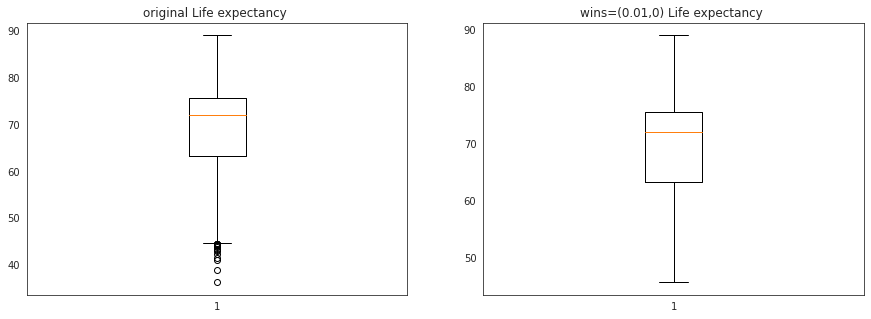

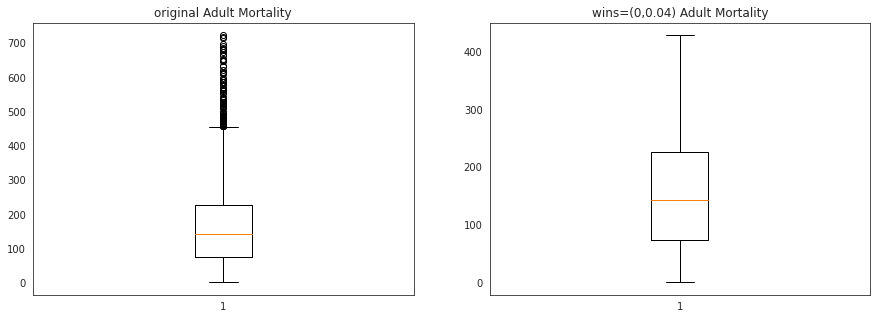

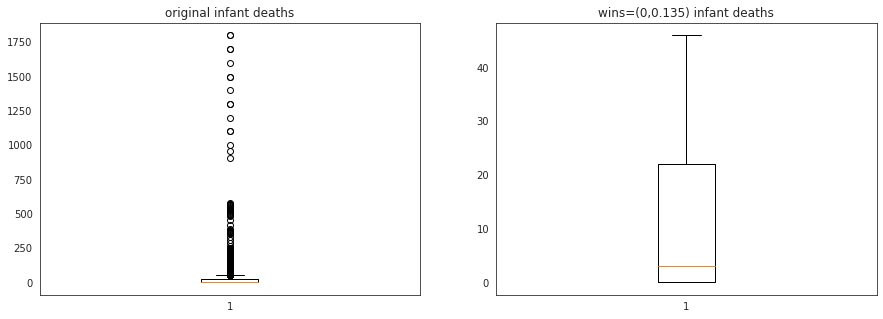

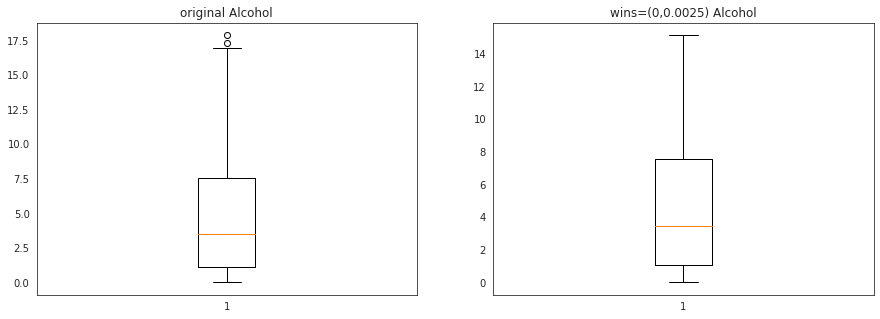

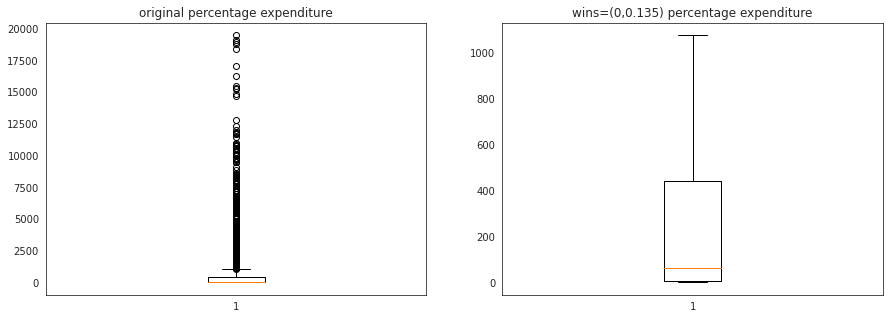

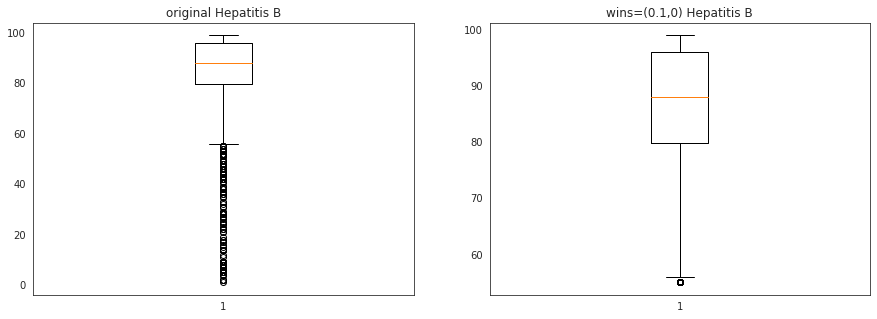

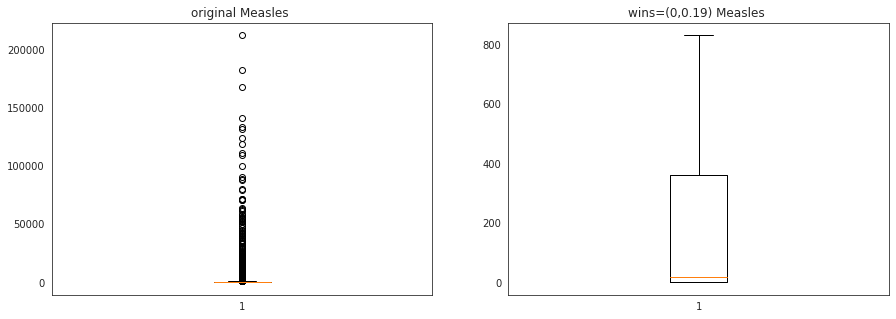

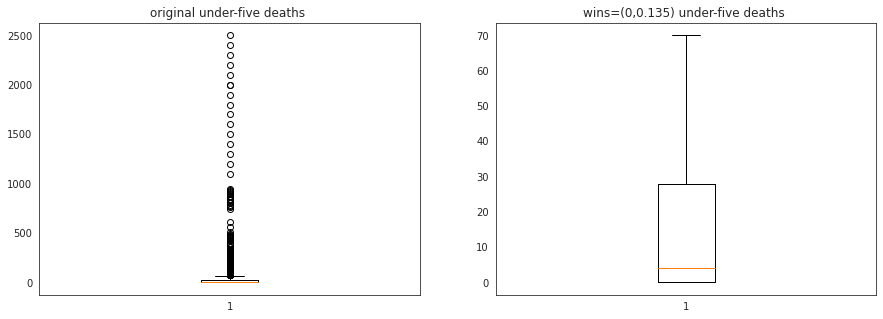

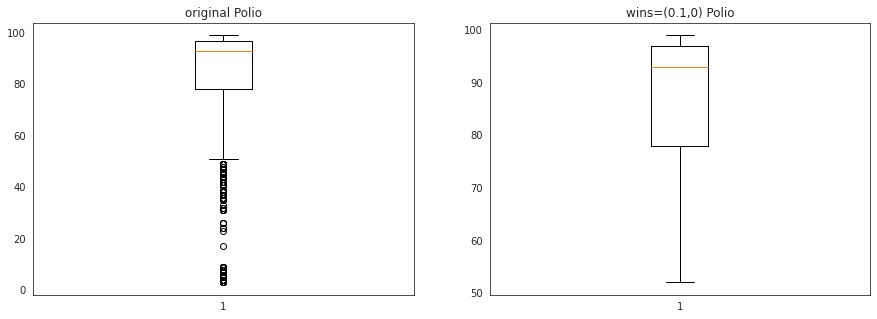

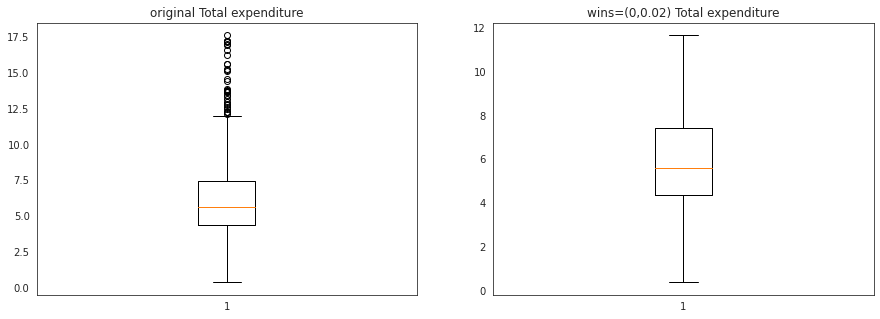

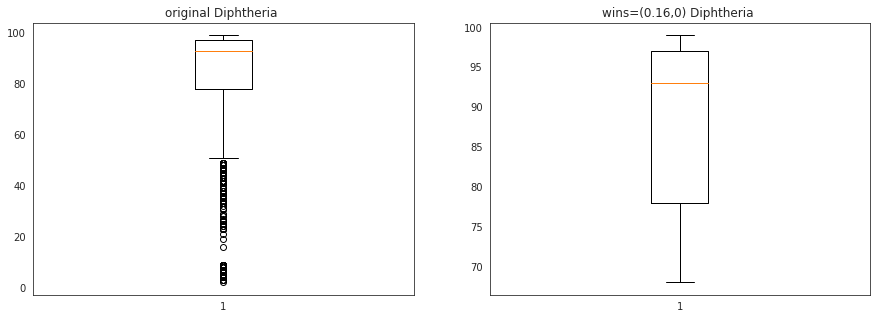

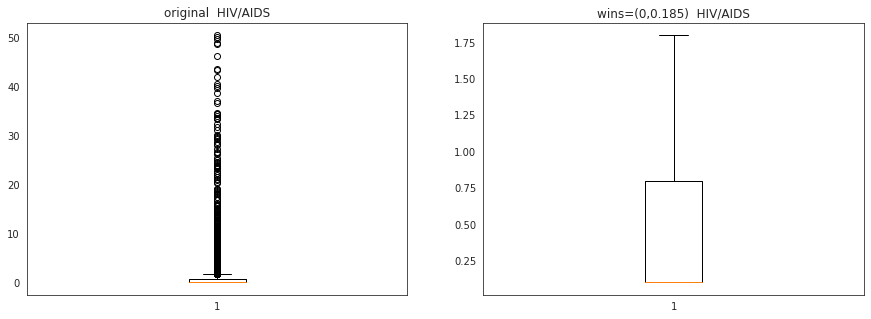

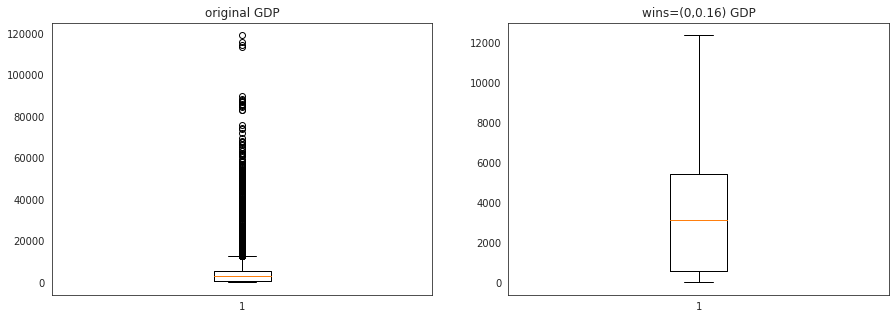

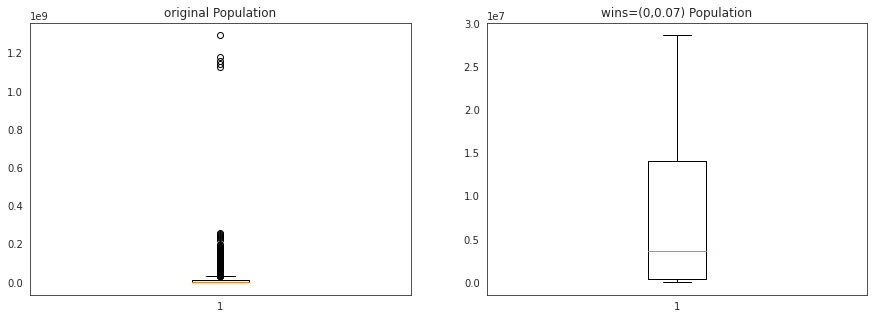

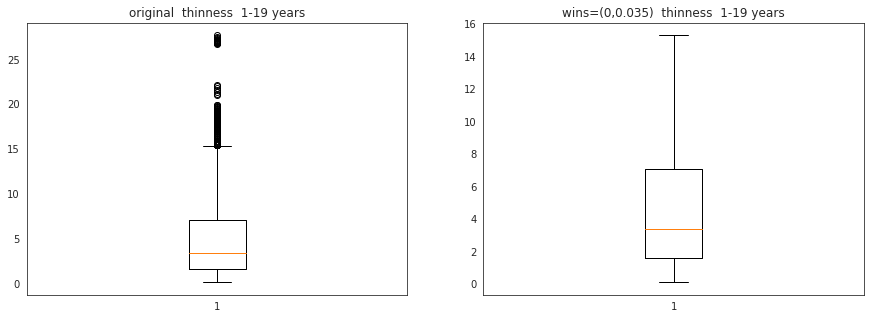

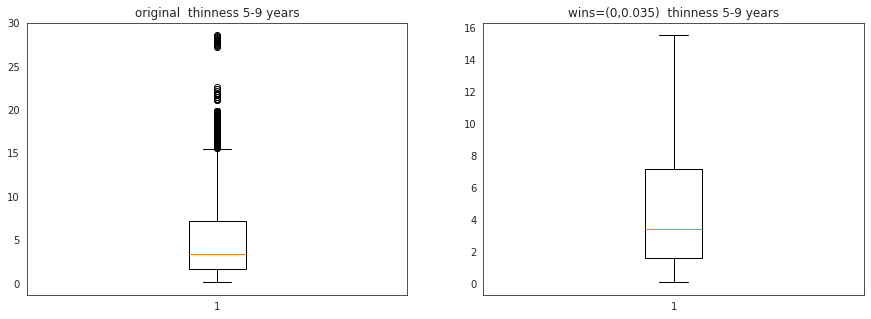

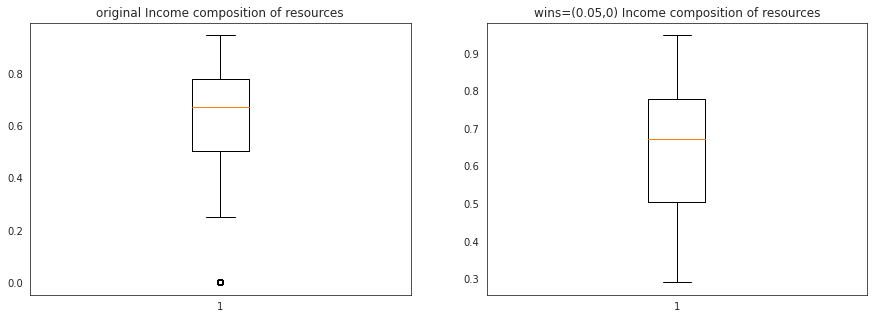

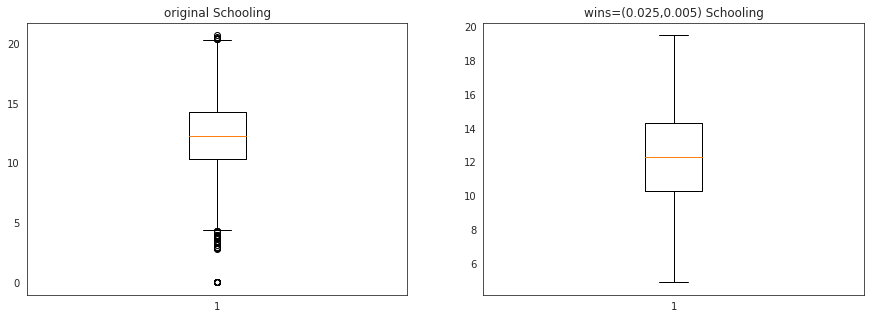

In [112]:
wins_dict = {}
test_wins(cont_vars[0], lower_limit=.01, show_plot=True)
test_wins(cont_vars[1], upper_limit=.04, show_plot=True)
test_wins(cont_vars[2], upper_limit=.135, show_plot=True)
test_wins(cont_vars[3], upper_limit=.0025, show_plot=True)
test_wins(cont_vars[4], upper_limit=.135, show_plot=True)
test_wins(cont_vars[5], lower_limit=.1, show_plot=True)
test_wins(cont_vars[6], upper_limit=.19, show_plot=True)
test_wins(cont_vars[8], upper_limit=.135, show_plot=True)
test_wins(cont_vars[9], lower_limit=.1, show_plot=True)
test_wins(cont_vars[10], upper_limit=.02, show_plot=True)
test_wins(cont_vars[11], lower_limit=.160, show_plot=True)
test_wins(cont_vars[12], upper_limit=.185, show_plot=True)
test_wins(cont_vars[13], upper_limit=.160, show_plot=True)
test_wins(cont_vars[14], upper_limit=.07, show_plot=True)
test_wins(cont_vars[15], upper_limit=.035, show_plot=True)
test_wins(cont_vars[16], upper_limit=.035, show_plot=True)
test_wins(cont_vars[17], lower_limit=.05, show_plot=True)
test_wins(cont_vars[18], lower_limit=.025, upper_limit=.005, show_plot=True)

In [113]:
# creating separated dataframes for developed and developing countries
developing = df[(df["Status"].str.contains("Developing"))]
developed = df[(df["Status"].str.contains("Developed"))]

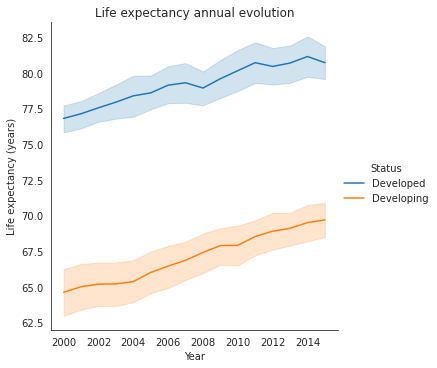

In [114]:
sns.relplot(x="Year", y="Life expectancy ", kind="line", hue="Status",data=df)
pyplot.title("Life expectancy annual evolution", fontsize=12)
sns.set_style("white")
pyplot.xlabel("Year")
pyplot.ylabel("Life expectancy (years)")
pyplot.show()

Life expectancy                    1.000000
Schooling                          0.732084
Income composition of resources    0.708651
 BMI                               0.560105
Diphtheria                         0.475972
Polio                              0.462146
GDP                                0.452066
Alcohol                            0.404677
percentage expenditure             0.381990
Hepatitis B                        0.231115
Total expenditure                  0.217361
Year                               0.168709
Population                        -0.022987
Measles                           -0.157401
infant deaths                     -0.196324
under-five deaths                 -0.222286
 thinness 5-9 years               -0.468218
 thinness  1-19 years             -0.473757
 HIV/AIDS                         -0.556165
Adult Mortality                   -0.696386
Name: Life expectancy , dtype: float64

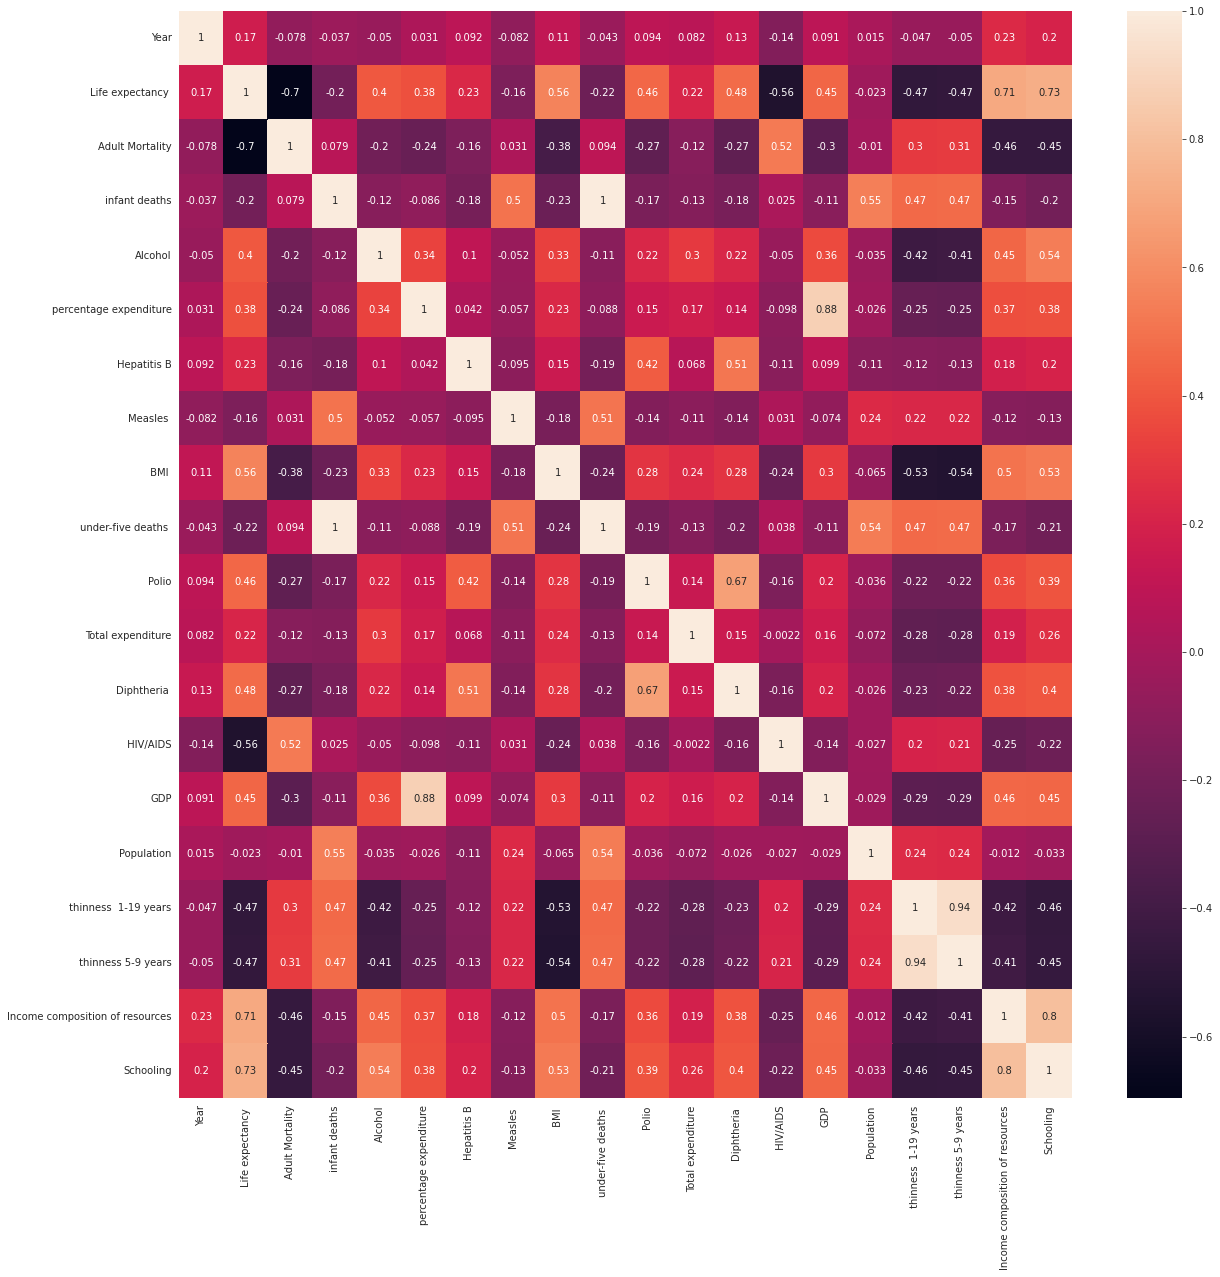

In [115]:
pyplot.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
df.corr()['Life expectancy '].sort_values(ascending=False)

In [116]:
df_1=df
df=df.iloc[:,3:21]

The feature scores generated using ANVOA method are: 
Feature  HIV/AIDS: 15.336234
Feature Adult Mortality: 11.307959
Feature Income composition of resources: 10.555751
Feature GDP: 5.943063
Feature percentage expenditure: 5.475473
Feature  BMI : 4.792473
Feature  thinness  1-19 years: 4.029461
Feature  thinness 5-9 years: 3.969510
Feature Diphtheria : 3.801117
Feature Alcohol: 3.667684
Feature Polio: 3.620805
Feature Total expenditure: 2.209937
Feature under-five deaths : 1.766100
Feature Measles : 1.683535
Feature infant deaths: 1.621981
Feature Hepatitis B: 1.452841
Feature Population: 0.932367


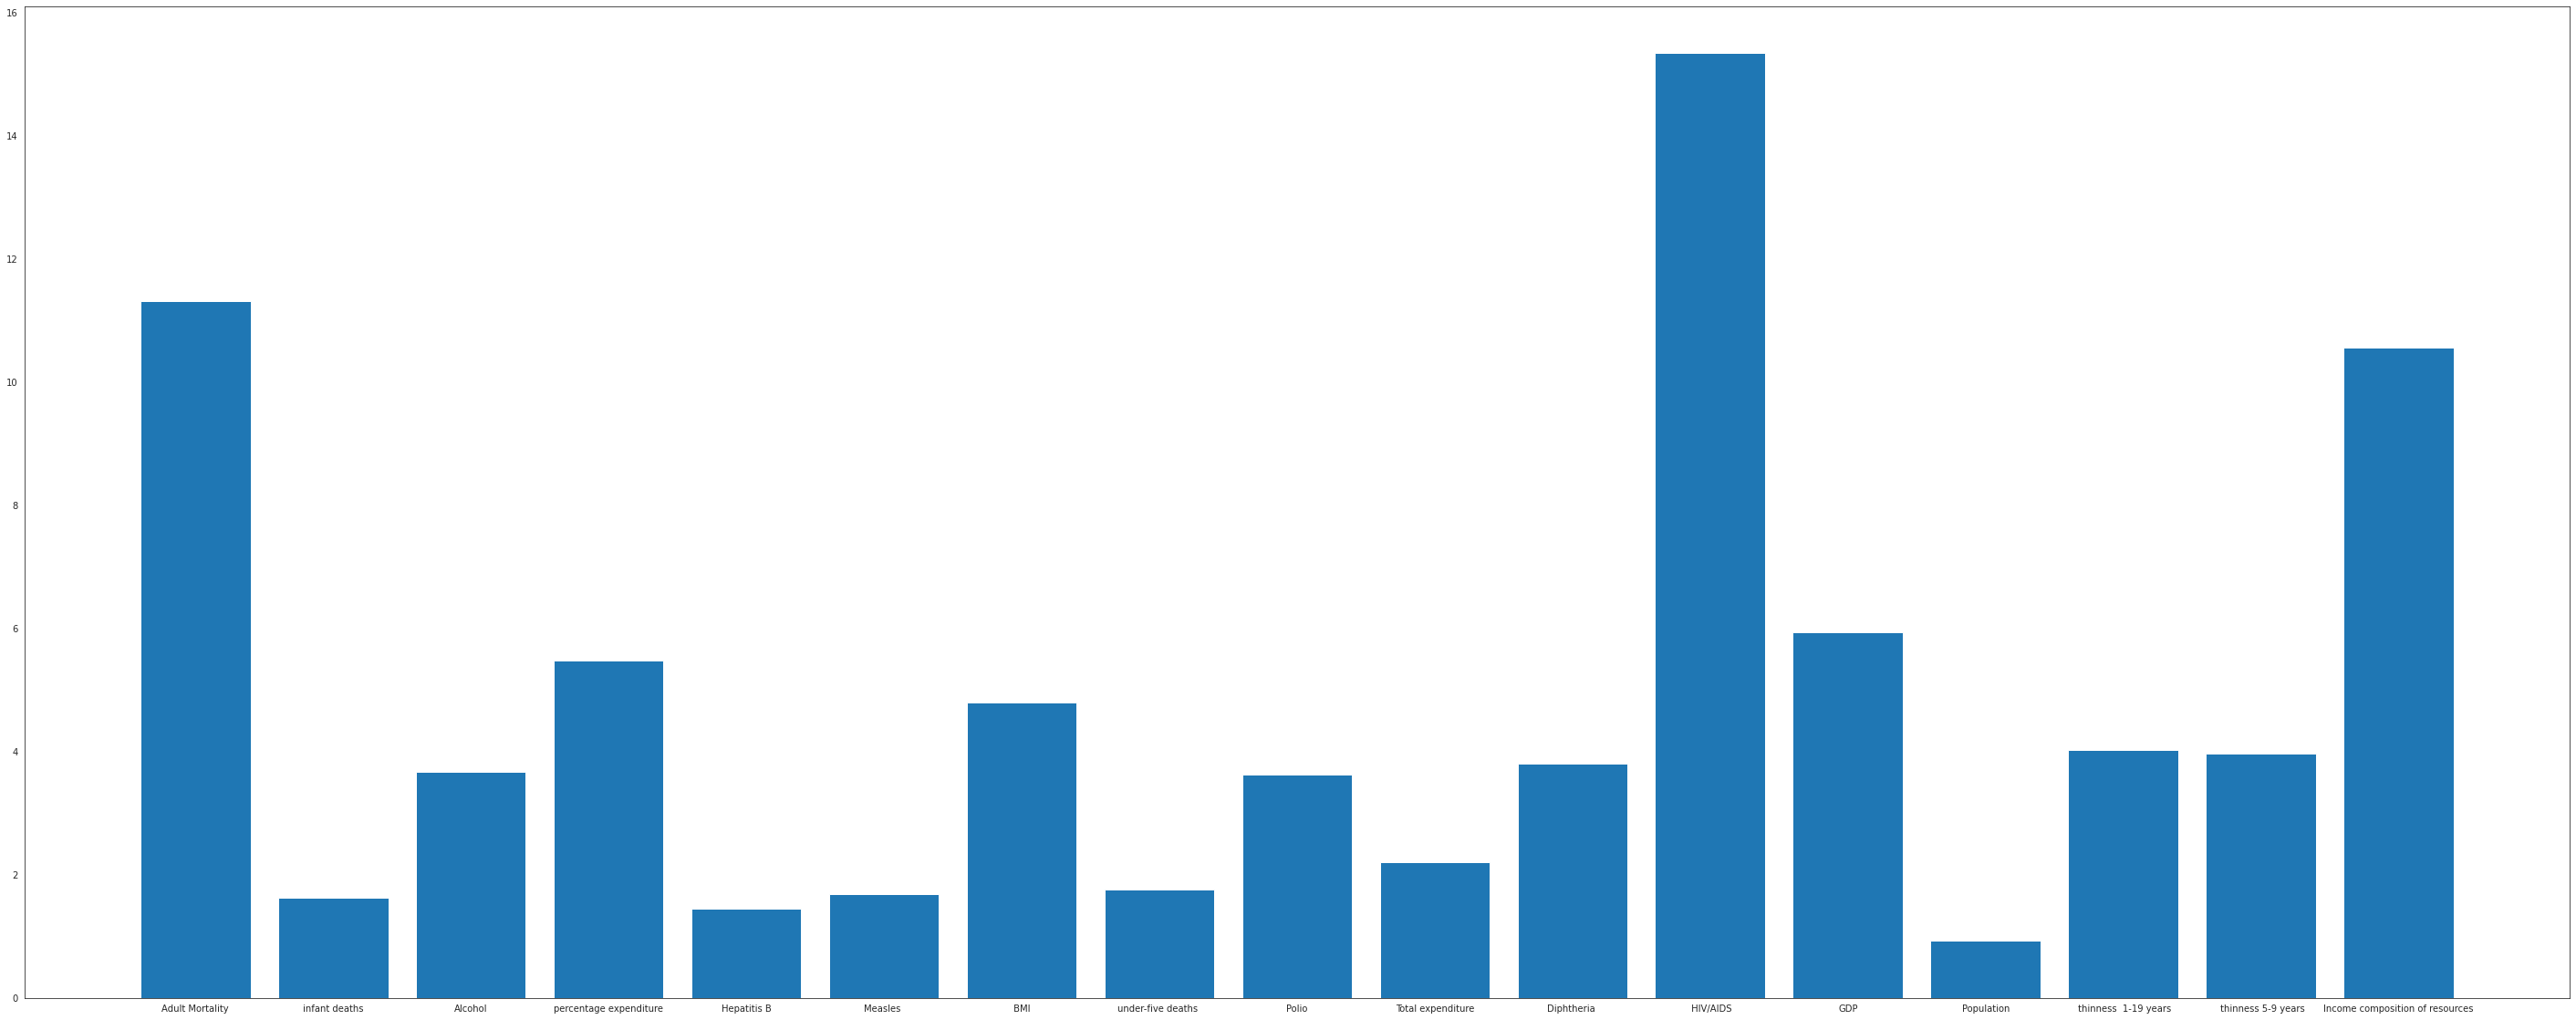

In [117]:
# feature extraction using ANOVA or univariate Statistical tests

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# specify features
X = df.drop(columns = ["Life expectancy "], axis = 1) #feature matrix
y = df["Life expectancy "] #target

fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X, y)
# transform train input data
X_train_fs = fs.transform(X)
features = X.columns
print("The feature scores generated using ANVOA method are: ")
features_map = []
for i in range(len(fs.scores_)):
    features_map.append([features[i], float(fs.scores_[i])])
features_map = sorted(features_map, key=lambda x:x[1], reverse = True)
for i in range(len(fs.scores_)):
	print('Feature %s: %f' % (features_map[i][0], features_map[i][1]))
# plot the scores
pyplot.figure(figsize=(50,20))
pyplot.bar([i for i in features], fs.scores_)
pyplot.show() 

In [118]:
df_2=df[[" HIV/AIDS",'Adult Mortality','Income composition of resources','GDP','Diphtheria ','Measles ','Hepatitis B','Polio','percentage expenditure',' BMI ']]
df_3=df[[" HIV/AIDS",'Adult Mortality','Income composition of resources','GDP','percentage expenditure',' BMI ']]


In [119]:
x = df_2
y = df_1['Life expectancy ']
X = df_3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [120]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled.shape


(2203, 10)

In [121]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape
X_test_scaled.shape

(735, 6)

In [122]:
model = Sequential()

model.add(Dense(28,input_shape=(10,),activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-2),
    bias_regularizer=regularizers.L2(1e-3),
    activity_regularizer=regularizers.L2(1e-4)))

#Hidden Layer
model.add(Dense(56,activation='relu'))
model.add(Dense(42,activation='relu'))
model.add(Dense(35,activation='relu'))
model.add(Dense(20,activation='relu'))

#Output layer

model.add(Dense(1))

In [123]:
model.compile(optimizer='Adam',loss='mse',metrics=['mae'])


In [124]:
model.fit(x=x_train_scaled,y=y_train.values,validation_data=(x_test_scaled,y_test.values),batch_size=128,epochs=600)

Epoch 1/600
18/18 [==============================] - 1s 17ms/step - loss: 4829.0098 - mae: 68.8349 - val_loss: 4827.7446 - val_mae: 68.8607
Epoch 2/600
18/18 [==============================] - 0s 7ms/step - loss: 4638.1509 - mae: 67.4563 - val_loss: 4429.4990 - val_mae: 65.9634
Epoch 3/600
18/18 [==============================] - 0s 4ms/step - loss: 3800.1667 - mae: 60.9400 - val_loss: 2740.3433 - val_mae: 51.8330
Epoch 4/600
18/18 [==============================] - 0s 6ms/step - loss: 1262.5560 - mae: 31.9377 - val_loss: 90.5651 - val_mae: 7.0583
Epoch 5/600
18/18 [==============================] - 0s 5ms/step - loss: 179.8430 - mae: 10.5949 - val_loss: 93.6052 - val_mae: 7.1374
Epoch 6/600
18/18 [==============================] - 0s 5ms/step - loss: 99.8331 - mae: 7.6919 - val_loss: 75.2163 - val_mae: 6.2776
Epoch 7/600
18/18 [==============================] - 0s 5ms/step - loss: 78.0611 - mae: 6.4377 - val_loss: 71.3394 - val_mae: 6.0543
Epoch 8/600
18/18 [==========================

In [125]:
predictions = model.predict(x_test_scaled)


23/23 [==============================] - 0s 2ms/step


In [126]:
mean_abs_error = mean_absolute_error(predictions,y_test)
mean_abs_error

1.885948403287096

In [127]:
model1 = Sequential()

model1.add(Dense(28,input_shape=(6,),activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-2),
    bias_regularizer=regularizers.L2(1e-3),
    activity_regularizer=regularizers.L2(1e-4)))

#Hidden Layer
model1.add(Dense(56,activation='relu'))
model1.add(Dense(42,activation='relu'))
model1.add(Dense(35,activation='relu'))
model1.add(Dense(20,activation='relu'))

#Output layer

model1.add(Dense(1))

In [130]:
model1.compile(optimizer='Adam',loss='mse',metrics=['mae'])


In [131]:
model1.fit(x=X_train_scaled,y=y_train.values,validation_data=(X_test_scaled,y_test.values),batch_size=128,epochs=600)

Epoch 1/600
18/18 [==============================] - 1s 16ms/step - loss: 4846.3325 - mae: 68.9597 - val_loss: 4875.8696 - val_mae: 69.2036
Epoch 2/600
18/18 [==============================] - 0s 6ms/step - loss: 4759.1382 - mae: 68.3377 - val_loss: 4707.3345 - val_mae: 68.0010
Epoch 3/600
18/18 [==============================] - 0s 6ms/step - loss: 4410.8325 - mae: 65.7840 - val_loss: 3994.4077 - val_mae: 62.6512
Epoch 4/600
18/18 [==============================] - 0s 7ms/step - loss: 3094.9893 - mae: 54.8302 - val_loss: 1733.2539 - val_mae: 41.0793
Epoch 5/600
18/18 [==============================] - 0s 5ms/step - loss: 634.4848 - mae: 21.1498 - val_loss: 248.2280 - val_mae: 13.1569
Epoch 6/600
18/18 [==============================] - 0s 5ms/step - loss: 189.7948 - mae: 10.8815 - val_loss: 130.6631 - val_mae: 8.5542
Epoch 7/600
18/18 [==============================] - 0s 6ms/step - loss: 117.4466 - mae: 8.1639 - val_loss: 98.7880 - val_mae: 7.7223
Epoch 8/600
18/18 [=================

In [133]:
predictions1 = model1.predict(X_test_scaled)

23/23 [==============================] - 0s 2ms/step


In [134]:
mean_abs_error = mean_absolute_error(predictions1,y_test)
mean_abs_error

2.0792201471653113